<a href="https://colab.research.google.com/github/spctr01/10DayMLChallenge/blob/master/day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!mkdir -p ~/.kaggle

#coping api token &permission to execute &download dataset
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json



In [2]:
#downloading kaggle dataset
!kaggle competitions download -c titanic

  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 52.5MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 53.7MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 3.25MB/s]


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [230]:
data = pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


    PassengerId: Passenger’s unique ID
    Survived: Survival status of the passengers (0 = No; 1 = Yes)
    Pclass: Passenger class (1 = First; 2 = Second; 3 = Third)
    Name: Passenger’s name
    Sex: Sex of the Passenger
    Age: Age of the Passenger
    SibSp: Number of siblings/spouses aboard
    ParCh: Number of parents/children aboard
    Ticket: Ticket number
    Fare: Passenger fare
    Cabin: Cabin
    Embarked: Port of embarkation (C = Cherbourg; Q = Queenstown;           
                                    S =Southampton)



# Visualizing

In [192]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

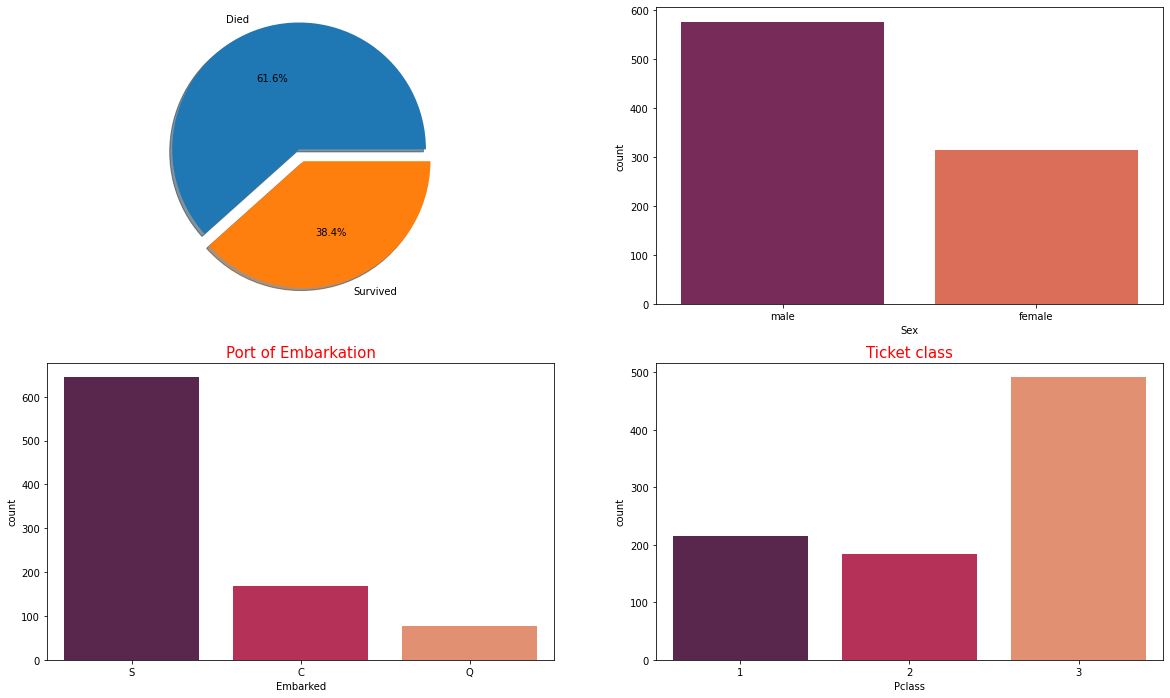

In [193]:
# # visualizing how many survived and how many doesnt
# #  0=No 1= Yes


sizes=  [data['Survived'].value_counts().values]
labels = ['Died','Survived']
explode = (0.1,0)

fig, ax = plt.subplots(2,2, figsize=(20,12))
ax[0,0].pie(sizes, labels=labels,
       explode = explode, 
       shadow= True,  
       autopct='%1.1f%%')
ax[0,0].axis('equal')  # Equal aspect ratio ensures the pie chart is circular.



#total no of male and female on ship

sns.countplot('Sex', data=data, palette="rocket", ax = ax[0,1])

ax[1,0].set_title('Port of Embarkation',color= 'red', fontsize=15)
sns.countplot('Embarked', data= data,palette="rocket", ax= ax[1,0])

ax[1,1].set_title('Ticket class',color= 'red', fontsize=15)
sns.countplot('Pclass', data= data,  palette="rocket", ax= ax[1,1])
plt.show();






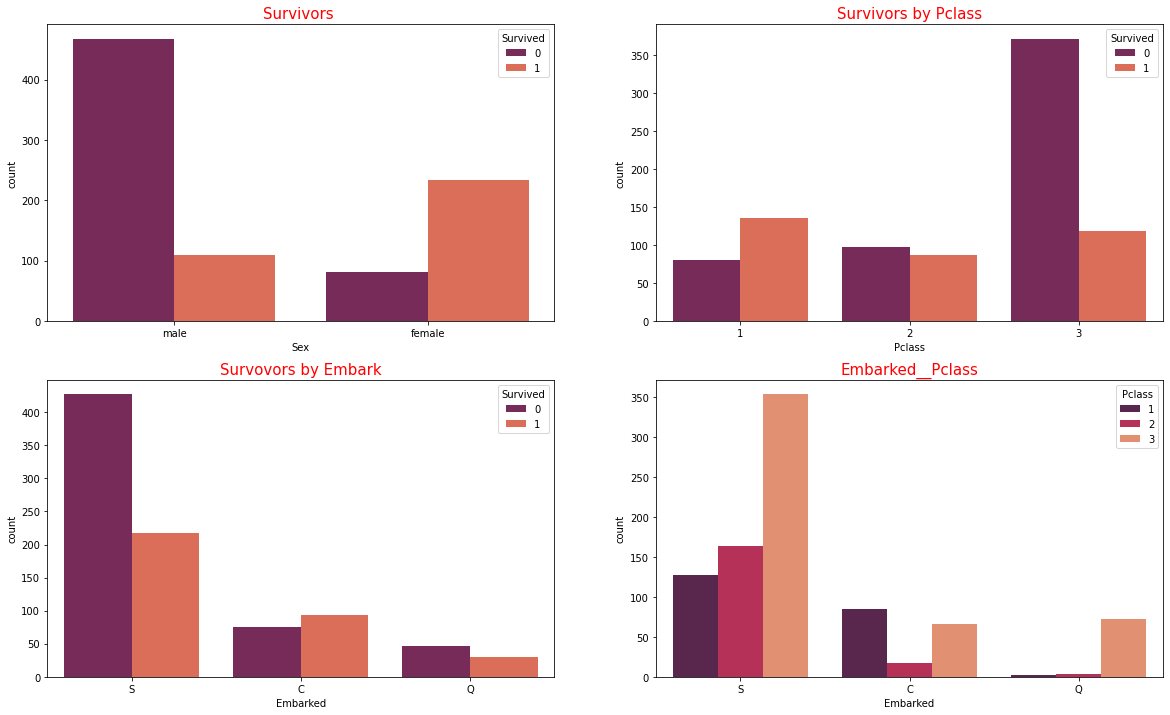

In [194]:
# visualizing survivors
fig , ax = plt.subplots(2,2, figsize=(20,12))

ax[0,0].set_title('Survivors ',color= 'red', fontsize=15)
sns.countplot('Sex', data= data, hue='Survived', palette="rocket", ax= ax[0,0])

ax[0,1].set_title('Survivors by Pclass',color= 'red', fontsize=15)
sns.countplot('Pclass', data= data, hue='Survived', palette="rocket", ax= ax[0,1])

ax[1,0].set_title('Survovors by Embark',color= 'red', fontsize=15)
sns.countplot('Embarked', data= data, hue='Survived', palette="rocket", ax= ax[1,0])


ax[1,1].set_title('Embarked__Pclass',color= 'red', fontsize=15)
sns.countplot('Embarked', data= data, hue='Pclass', palette="rocket", ax= ax[1,1])



plt.show();

# Dealing with the null values  (**[Kaggle](https://www.kaggle.com/pavansanagapati/simple-tutorial-how-to-handle-missing-data)**)


In [195]:
#no/ of  null values in each column
data.isna().sum()



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [232]:
#filling age data with the average of the column (age) and converting it into int
data['Age'].fillna(data['Age'].mean(), inplace = True)
data['Age'] = data['Age'].astype(int)

#Fare is float so round it and change to int
data['Fare']= data['Fare'].round(0).astype(int)

#filling Embarked value with most common value (categorical)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace= True)

# cabin has lot of missing values so its good to drop it but  cabin starting is with  "A-G" reprsents the deck 
#so we can use only deck no's and remove the no after  deck category (eg : C143 TO C) 
#As there are many missing values in cabin so assigning a diff category to missing values "U"=unknowm
data['Cabin'].fillna('U', inplace= True)

data.isna().sum()



PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Encoding

In [234]:
from sklearn.preprocessing import LabelEncoder

#Name is not needed so drop it
data.drop('Name', axis= 1, inplace=True)
# droping ticket
data.drop('Ticket', axis= 1, inplace= True)

# encoding catagorical data
enc = LabelEncoder()
data['Embarked']= enc.fit_transform(data['Embarked'])
data['Sex']= enc.fit_transform(data['Sex'])

# dealing with deck categories simply removing numeric values only deck catefory remains & then encoding the category
# there are some values with two or more cabin no (eg: c123 c234 etc) so only considering first cabin no
data['Cabin']= data['Cabin'].str[0]
data['Cabin'] = enc.fit_transform(data['Cabin'])

data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22,1,0,7,8,2
1,2,1,1,0,38,1,0,71,2,0
2,3,1,3,0,26,0,0,8,8,2
3,4,1,1,0,35,1,0,53,2,2
4,5,0,3,1,35,0,0,8,8,2
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27,0,0,13,8,2
887,888,1,1,0,19,0,0,30,1,2
888,889,0,3,0,29,1,2,23,8,2
889,890,1,1,1,26,0,0,30,2,0


In [228]:
data.dtypes

PassengerId    int64
Survived       int64
Pclass         int64
Sex            int64
Age            int64
SibSp          int64
Parch          int64
Fare           int64
Cabin          int64
Embarked       int64
dtype: object

# Now Data is cleaned and preprocessed

# 1. Selecting the features that can be  responsible for survival chances.

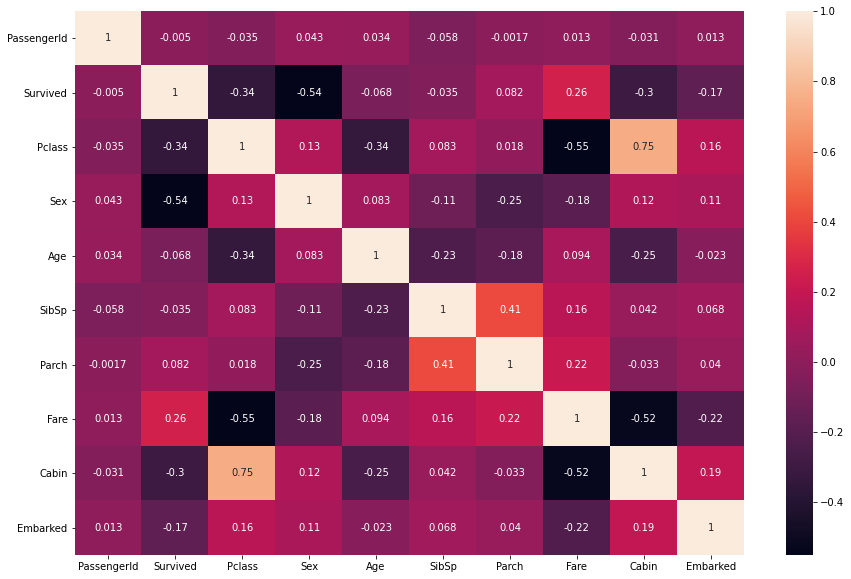

In [258]:
corr = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True);

In [260]:
data.drop(['PassengerId', 'Age', 'SibSp', 'Parch'], axis= 1, inplace= True)
data

,Survived,Pclass,Sex,Fare,Cabin,Embarked
0,0,3,1,7,8,2
1,1,1,0,71,2,0
2,1,3,0,8,8,2
3,1,1,0,53,2,2
4,0,3,1,8,8,2
...,...,...,...,...,...,...
886,0,2,1,13,8,2
887,1,1,0,30,1,2
888,0,3,0,23,8,2
889,1,1,1,30,2,0
